In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from files
# fist column is the batch number
# second column is the loss or accuracy
loss_data = pd.read_csv('lossArr.txt', sep="\t", header=None, names=["Batches", "Loss"], index_col=False)
accuracy_data = pd.read_csv('accuracyArr.txt', sep="\t", header=None, names=["Batches", "Accuracy"], index_col=False)

print(loss_data.head())
print(accuracy_data.head())

   Batches      Loss
0      0.0  2.328233
1   3000.0  0.985787
2   6000.0  0.052654
3   9000.0  0.475713
4  12000.0  0.017739
   Batches  Accuracy
0      0.0    0.0971
1   3000.0    0.9127
2   6000.0    0.9259
3   9000.0    0.9384
4  12000.0    0.9542


In [46]:
# smooth the curves
def smooth_curve(points, factor=0.8):
    """ Smooth the curve with a moving average """
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

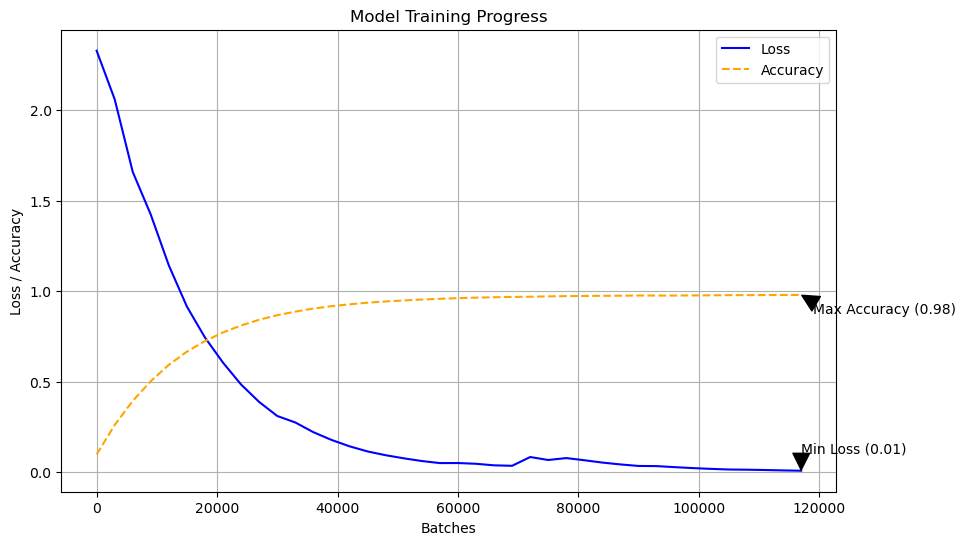

In [47]:
# Smoothing the data
loss_data['Loss'] = smooth_curve(loss_data['Loss'])
accuracy_data['Accuracy'] = smooth_curve(accuracy_data['Accuracy'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot Loss
plt.plot(loss_data['Batches'], loss_data['Loss'], label='Loss', linestyle='-', color='blue')

# Plot Accuracy on the same x-axis
plt.plot(accuracy_data['Batches'], accuracy_data['Accuracy'], label='Accuracy', linestyle='--', color='orange')

# Annotations for min loss and max accuracy
min_loss_batch = loss_data['Batches'][loss_data['Loss'].idxmin()]
min_loss = loss_data['Loss'].min()
plt.annotate(f'Min Loss ({min_loss:.2f})', xy=(min_loss_batch, min_loss), xytext=(min_loss_batch+10, min_loss+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),)

max_acc_batch = accuracy_data['Batches'][accuracy_data['Accuracy'].idxmax()]
max_acc = accuracy_data['Accuracy'].max()
plt.annotate(f'Max Accuracy ({max_acc:.2f})', xy=(max_acc_batch, max_acc), xytext=(max_acc_batch+2000, max_acc-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),)

# Labels and titles
plt.xlabel('Batches')
plt.ylabel('Loss / Accuracy')
plt.title('Model Training Progress')
plt.legend()

# Adding grid
plt.grid(True)

plt.show()